In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
plt.style.use('seaborn')
def drawImg(img, title = "Image"):
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.title(title+str(img.shape))
    plt.show()

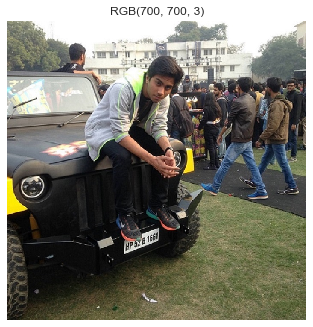

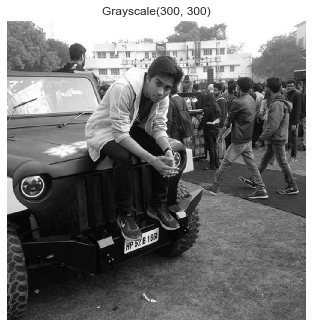

In [3]:
img_ = cv2.imread("image.jpg")
img_ = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img = cv2.resize(img_,(300,300))
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
drawImg(img_,'RGB')
drawImg(img_gray,"Grayscale")

In [48]:
def convolution(img,img_filter):
    
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0] #3
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j] * img_filter[i][j]
                    
                if new_img[row][col] > 255:
                    new_img[row][col] = 255
                elif new_img[row][col] < 0:
                    new_img[row][col] = 0
                    
    return new_img #Activation Map
                    
    
    

In [49]:
blur_filter = np.ones((3,3))/9.0
print(blur_filter)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [50]:
output1 = convolution(img_gray,blur_filter)

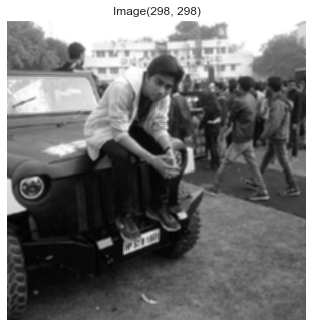

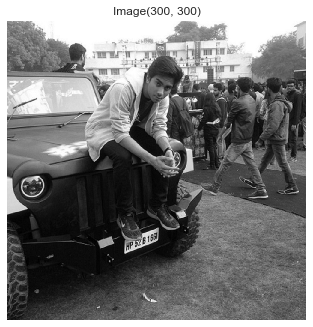

In [51]:
drawImg(output1)
drawImg(img_gray)

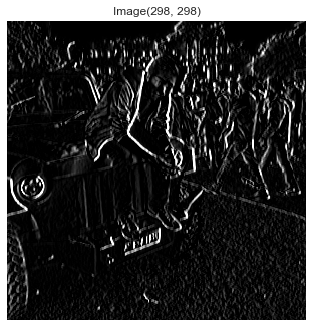

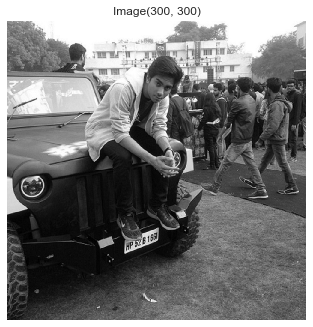

In [52]:
edge_filter = np.array(([1,0,-1],
                       [1,0,-1],
                       [1,0,-1]))
output2 = convolution(img_gray,edge_filter)
drawImg(output2)
drawImg(img_gray)

### Padding using Numpy

(300, 300, 3)


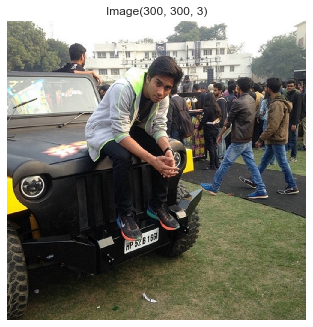

In [55]:
print(img.shape)
drawImg(img)



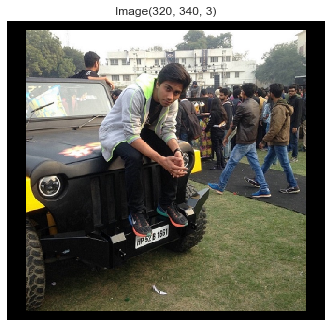

In [64]:
# Padding Image
pad_img = np.pad(img,((10,10),(20,20),(0,0)),'constant',constant_values=0)
drawImg(pad_img)

## Pooling

In [5]:
X = np.array([[1,0,2,3],
            [4,6,6,8],
            [3,1,1,0],
            [1,2,2,4]])

def pooling(X,mode="max"):
    stride=2
    F=2
    H,W = X.shape
    
    HO = int((H-F)/stride) + 1
    WO = int((W-F)/stride) + 1
    
    output = np.zeros((HO,WO))
    
    for r in range(HO):
        for c in range(WO):
            r_start = r*stride
            r_end = r_start + F
            c_start = c*stride
            c_end = c_start + F
            
             
            X_slice = X[r_start:r_end,c_start:c_end]
            
            if mode == "mean":
                output[r][c] = np.mean(X_slice)
            else:
                output[r][c] = np.max(X_slice)
                
    return output
                
            
            

In [6]:
pooling_output = pooling(X)
print(pooling_output)

rstart 0
rend 2
cstart 0
cend 2
rstart 0
rend 2
cstart 2
cend 4
rstart 2
rend 4
cstart 0
cend 2
rstart 2
rend 4
cstart 2
cend 4
[[6. 8.]
 [3. 4.]]
